In [1]:
import pandas as pd
import requests
from io import StringIO
import time

print("🔬 Starting ClinVar BRCA Data Download...")
print("=" * 60)

# ClinVar FTP download URL for variant summary
# This contains all ClinVar variants with their classifications
url = "https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz"

print(f"\n📡 Downloading data from ClinVar...")
print(f"URL: {url}")
print("⏳ This may take 2-5 minutes (file is ~500MB)...\n")

try:
    # Download the data
    df = pd.read_csv(url, sep='\t', compression='gzip', low_memory=False)
    
    print(f"✅ Download complete!")
    print(f"📊 Total variants downloaded: {len(df):,}")
    
    # Filter for BRCA1 and BRCA2 genes only
    print("\n🧬 Filtering for BRCA1 and BRCA2 genes...")
    brca_df = df[df['GeneSymbol'].isin(['BRCA1', 'BRCA2'])].copy()
    print(f"✅ BRCA variants found: {len(brca_df):,}")
    
    # Filter for clear classifications (Benign or Pathogenic)
    print("\n🎯 Filtering for clear classifications...")
    
    # Keep only variants with clear benign or pathogenic classifications
    benign_terms = ['Benign', 'Likely benign']
    pathogenic_terms = ['Pathogenic', 'Likely pathogenic']
    
    brca_df = brca_df[
        brca_df['ClinicalSignificance'].isin(benign_terms + pathogenic_terms)
    ].copy()
    
    print(f"✅ Variants with clear classifications: {len(brca_df):,}")
    
    # Create binary label (0 = Benign, 1 = Pathogenic)
    brca_df['Label'] = brca_df['ClinicalSignificance'].apply(
        lambda x: 0 if x in benign_terms else 1
    )
    
    # Select relevant columns
    columns_to_keep = [
        'GeneSymbol',
        'ClinicalSignificance', 
        'Type',
        'Name',
        'Assembly',
        'Chromosome',
        'Start',
        'Stop',
        'ReviewStatus',
        'Label'
    ]
    
    brca_clean = brca_df[columns_to_keep].copy()
    
    # Display summary statistics
    print("\n" + "=" * 60)
    print("📊 DATASET SUMMARY")
    print("=" * 60)
    print(f"\nTotal BRCA mutations: {len(brca_clean):,}")
    print(f"\nBreakdown by gene:")
    print(brca_clean['GeneSymbol'].value_counts())
    print(f"\nBreakdown by classification:")
    print(brca_clean['ClinicalSignificance'].value_counts())
    print(f"\nBreakdown by type:")
    print(brca_clean['Type'].value_counts().head(10))
    
    # Save to CSV
    output_file = 'brca_mutations.csv'
    brca_clean.to_csv(output_file, index=False)
    print(f"\n💾 Data saved to: {output_file}")
    
    # Display first few rows
    print("\n" + "=" * 60)
    print("👀 FIRST 5 ROWS OF DATA:")
    print("=" * 60)
    print(brca_clean.head())
    
    print("\n✅ SUCCESS! Data is ready for analysis!")
    print(f"📁 File location: {output_file}")
    
except Exception as e:
    print(f"\n❌ Error occurred: {e}")
    print("\n💡 If download fails, try:")
    print("   1. Check your internet connection")
    print("   2. Run the script again (sometimes servers are slow)")
    print("   3. Let me know and I'll give you the manual download option")

🔬 Starting ClinVar BRCA Data Download...

📡 Downloading data from ClinVar...
URL: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz
⏳ This may take 2-5 minutes (file is ~500MB)...

✅ Download complete!
📊 Total variants downloaded: 8,816,704

🧬 Filtering for BRCA1 and BRCA2 genes...
✅ BRCA variants found: 73,452

🎯 Filtering for clear classifications...
✅ Variants with clear classifications: 37,362

📊 DATASET SUMMARY

Total BRCA mutations: 37,362

Breakdown by gene:
GeneSymbol
BRCA2    21886
BRCA1    15476
Name: count, dtype: int64

Breakdown by classification:
ClinicalSignificance
Pathogenic           17803
Likely benign        15144
Benign                3061
Likely pathogenic     1354
Name: count, dtype: int64

Breakdown by type:
Type
single nucleotide variant    21247
Deletion                      9650
Duplication                   3304
Insertion                     1413
Indel                          953
Microsatellite                 710
protein only   

In [2]:
# Quick verification
import pandas as pd
import os

if os.path.exists('brca_mutations.csv'):
    df = pd.read_csv('brca_mutations.csv')
    print(f"✅ File found!")
    print(f"📊 Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"\n🎯 Label distribution:")
    print(df['Label'].value_counts())
else:
    print("❌ File not found. The download might have failed.")

✅ File found!
📊 Shape: 37362 rows, 10 columns

🎯 Label distribution:
Label
1    19157
0    18205
Name: count, dtype: int64


📋 DATASET OVERVIEW

🔍 First 10 rows:
  GeneSymbol ClinicalSignificance            Type  \
0      BRCA2           Pathogenic        Deletion   
1      BRCA2           Pathogenic        Deletion   
2      BRCA2           Pathogenic        Deletion   
3      BRCA2           Pathogenic        Deletion   
4      BRCA2           Pathogenic        Deletion   
5      BRCA2           Pathogenic        Deletion   
6      BRCA2           Pathogenic  Microsatellite   
7      BRCA2           Pathogenic  Microsatellite   
8      BRCA2           Pathogenic        Deletion   
9      BRCA2           Pathogenic        Deletion   

                                                Name Assembly Chromosome  \
0                NM_000059.4(BRCA2):c.7004_7007+2del   GRCh37         13   
1                NM_000059.4(BRCA2):c.7004_7007+2del   GRCh38         13   
2    NM_000059.4(BRCA2):c.6275_6276del (p.Leu2092fs)   GRCh37         13   
3    NM_000059.4(BRCA2):c.6275_6276del (p.Leu2092fs)   GRCh38         13   

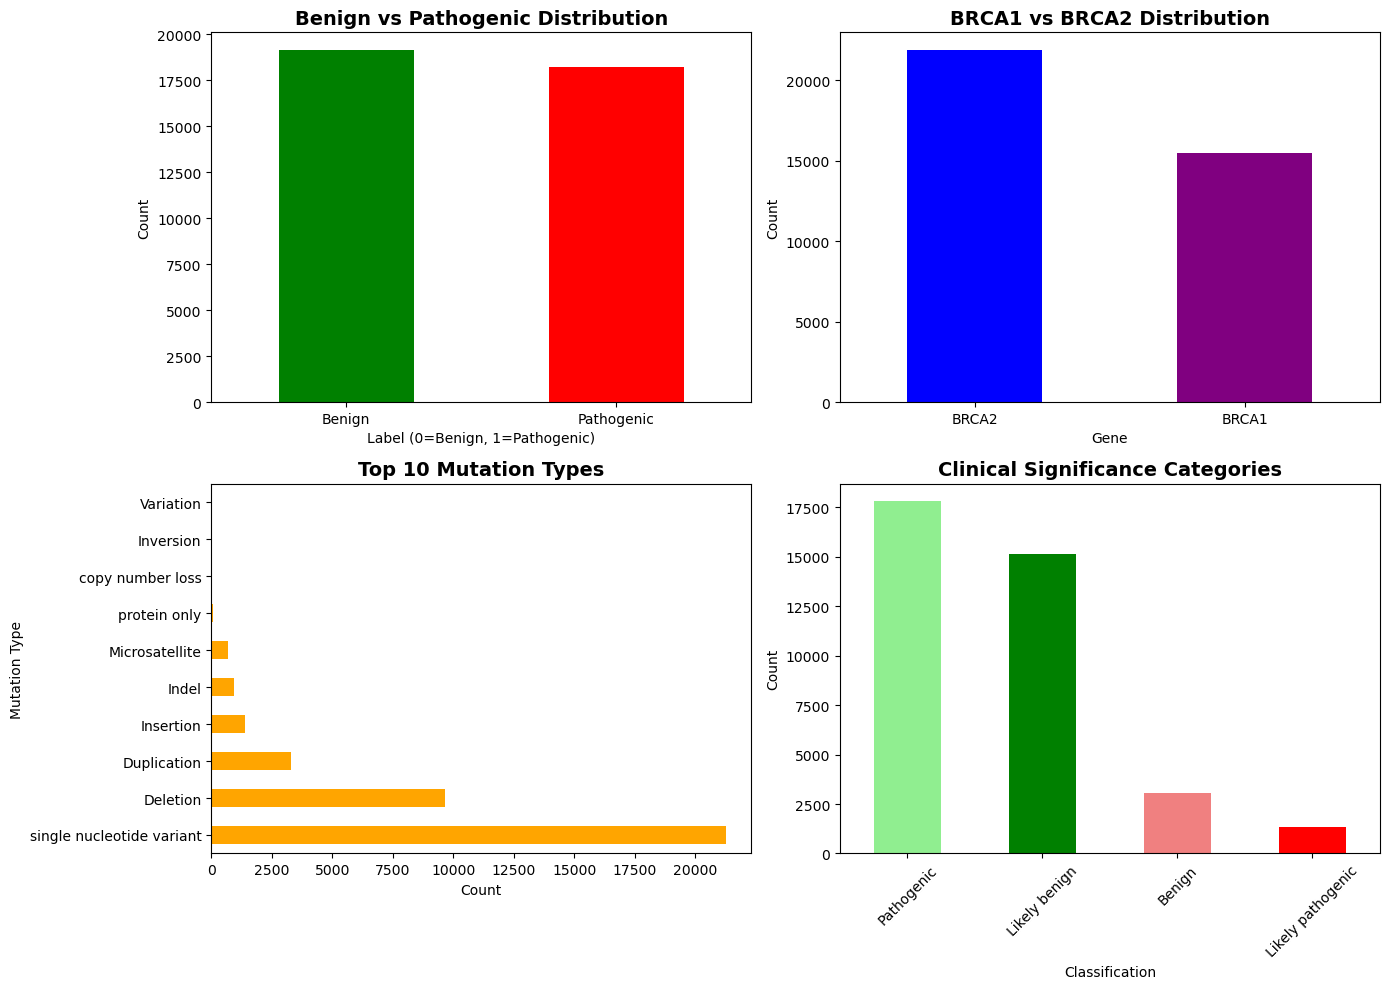


✅ Visualizations saved as 'data_exploration.png'

🎯 WEEK 1 - TASK 1 COMPLETE! ✅


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('brca_mutations.csv')

print("=" * 60)
print("📋 DATASET OVERVIEW")
print("=" * 60)

# Show first 10 rows
print("\n🔍 First 10 rows:")
print(df.head(10))

# Show column info
print("\n📊 Column Information:")
print(df.info())

# Show statistics
print("\n📈 Basic Statistics:")
print(df.describe())

# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Distribution by gene
print("\n🧬 Distribution by Gene:")
print(df['GeneSymbol'].value_counts())

# Distribution by mutation type
print("\n🔬 Distribution by Mutation Type:")
print(df['Type'].value_counts())

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Label distribution
df['Label'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Benign vs Pathogenic Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Label (0=Benign, 1=Pathogenic)')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['Benign', 'Pathogenic'], rotation=0)

# 2. Gene distribution
df['GeneSymbol'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['blue', 'purple'])
axes[0, 1].set_title('BRCA1 vs BRCA2 Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gene')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(df['GeneSymbol'].value_counts().index, rotation=0)

# 3. Top 10 mutation types
df['Type'].value_counts().head(10).plot(kind='barh', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top 10 Mutation Types', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Mutation Type')

# 4. Clinical significance breakdown
df['ClinicalSignificance'].value_counts().plot(kind='bar', ax=axes[1, 1], color=['lightgreen', 'green', 'lightcoral', 'red'])
axes[1, 1].set_title('Clinical Significance Categories', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Classification')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data_exploration.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved as 'data_exploration.png'")
print("\n🎯 WEEK 1 - TASK 1 COMPLETE! ✅")

In [4]:
import os

# Create project folders
folders = [
    'data',
    'notebooks', 
    'models',
    'visualizations',
    'website'
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"✅ Created folder: {folder}/")

# Move the data file to data folder
import shutil
if os.path.exists('brca_mutations.csv'):
    shutil.move('brca_mutations.csv', 'data/brca_mutations.csv')
    print("\n📁 Moved brca_mutations.csv to data/ folder")

print("\n🎯 Project structure created!")
print("\nYour project now looks like:")
print("""
QGene/
├── data/
│   └── brca_mutations.csv
├── notebooks/
├── models/
├── visualizations/
└── website/
""")

✅ Created folder: data/
✅ Created folder: notebooks/
✅ Created folder: models/
✅ Created folder: visualizations/
✅ Created folder: website/

📁 Moved brca_mutations.csv to data/ folder

🎯 Project structure created!

Your project now looks like:

QGene/
├── data/
│   └── brca_mutations.csv
├── notebooks/
├── models/
├── visualizations/
└── website/



🔬 DEEP DIVE INTO BRCA MUTATIONS DATA

1️⃣  DATA QUALITY CHECK

📊 Dataset Shape: 37,362 rows × 10 columns

❓ Missing Values per Column:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
✅ No missing values! Clean dataset!

2️⃣  GENE DISTRIBUTION ANALYSIS

🧬 Mutations per Gene:
GeneSymbol
BRCA2    21886
BRCA1    15476
Name: count, dtype: int64

🎯 Label Distribution per Gene:
            Benign %  Pathogenic %
GeneSymbol                        
BRCA1          45.59         54.41
BRCA2          50.95         49.05

3️⃣  MUTATION TYPE ANALYSIS

🔬 Top 15 Mutation Types:
Type
single nucleotide variant    21247
Deletion                      9650
Duplication                   3304
Insertion                     1413
Indel                          953
Microsatellite                 710
protein only                    62
copy number loss                 9
Inversion                        6
Variation                        4
copy number gain                 3
Complex                   

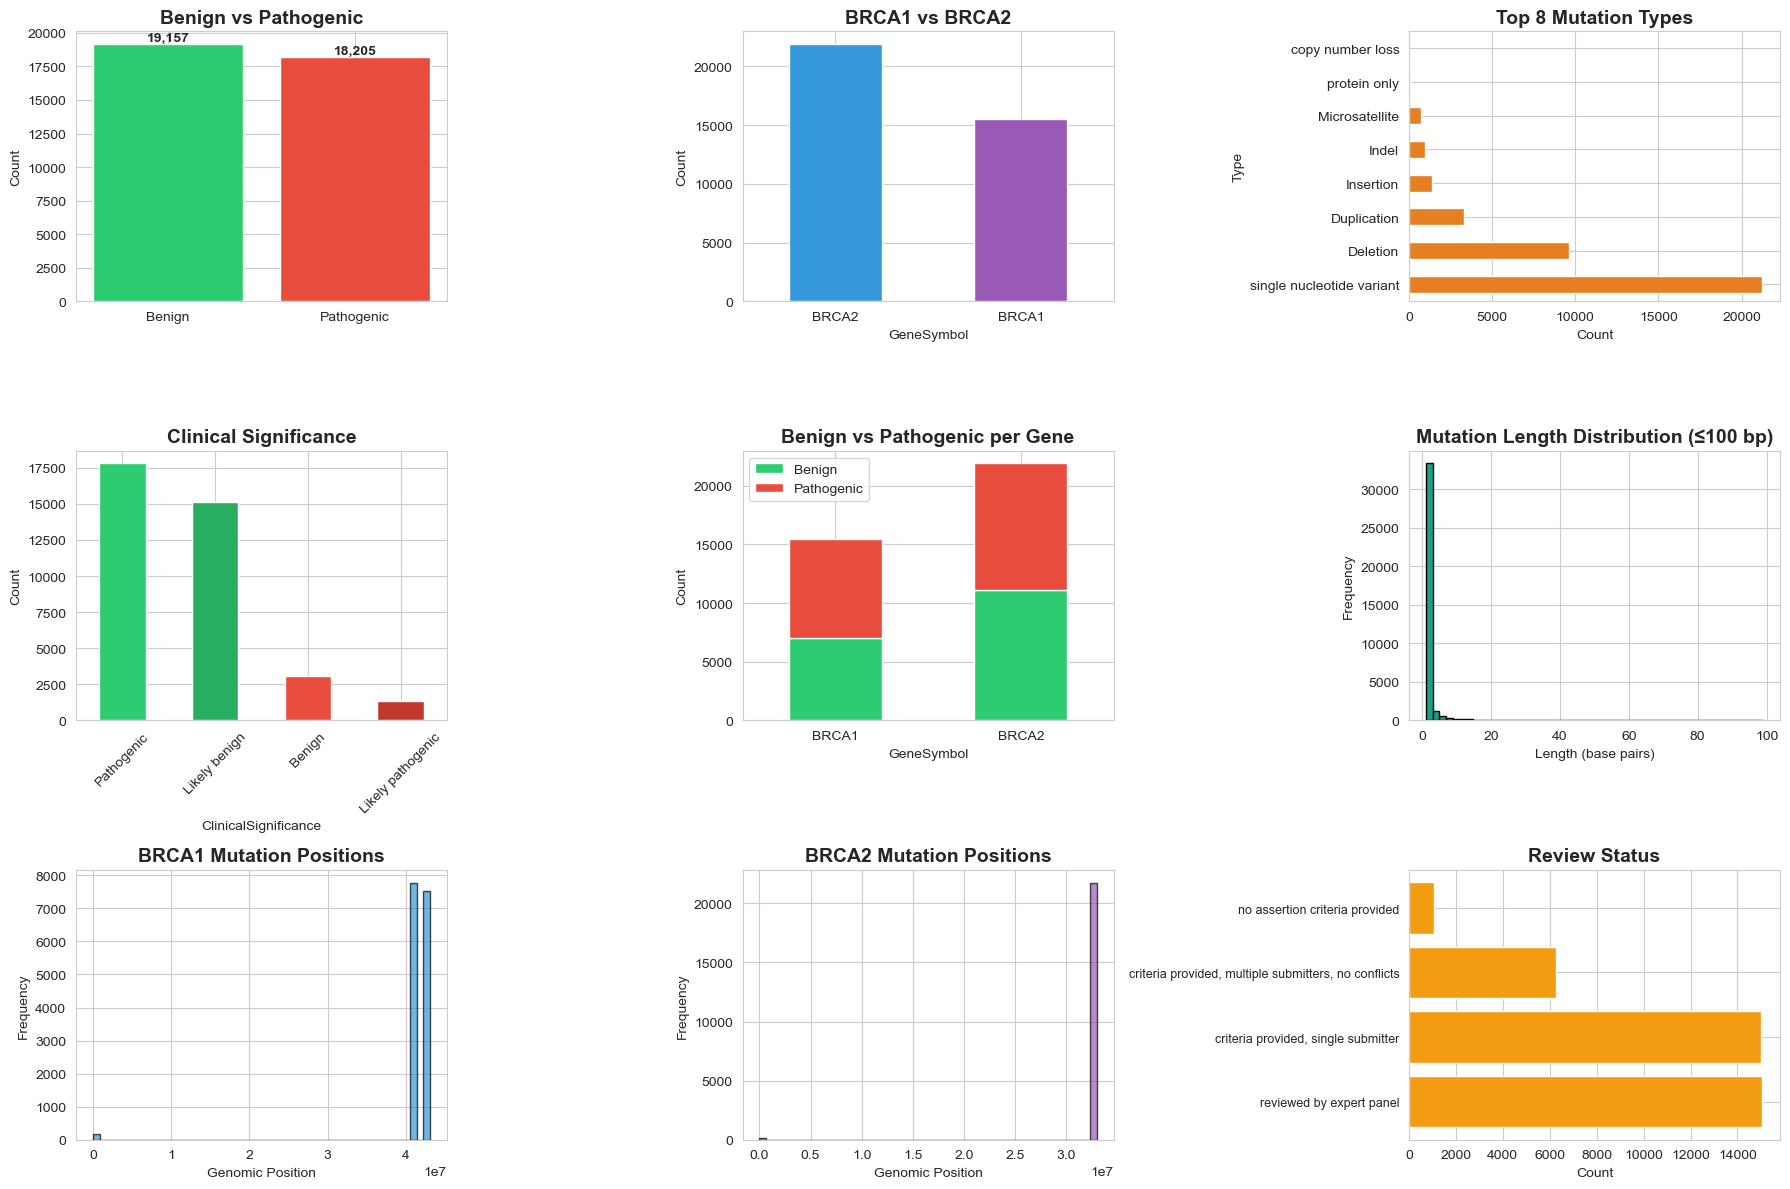


💡 KEY INSIGHTS & OBSERVATIONS

✅ Dataset Quality:
   • 37,362 total mutations (excellent size!)
   • 48.7% Benign vs 51.3% Pathogenic (well balanced!)
   • No missing values (clean data!)

🧬 Gene Balance:
   • BRCA1: 15,476 mutations
   • BRCA2: 21,886 mutations

🔬 Most Common Mutation Type:
   • single nucleotide variant: 21,247 occurrences

📊 Data is READY for machine learning!
   • Large dataset ✅
   • Balanced classes ✅  
   • Clean (no missing) ✅
   • Multiple features ✅

🎯 EXPLORATION COMPLETE!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Load data
df = pd.read_csv('data/brca_mutations.csv')

print("=" * 80)
print("🔬 DEEP DIVE INTO BRCA MUTATIONS DATA")
print("=" * 80)

# ==================== SECTION 1: DATA QUALITY ====================
print("\n" + "=" * 80)
print("1️⃣  DATA QUALITY CHECK")
print("=" * 80)

print(f"\n📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

print("\n❓ Missing Values per Column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values! Clean dataset!")

# ==================== SECTION 2: GENE ANALYSIS ====================
print("\n" + "=" * 80)
print("2️⃣  GENE DISTRIBUTION ANALYSIS")
print("=" * 80)

print("\n🧬 Mutations per Gene:")
gene_counts = df['GeneSymbol'].value_counts()
print(gene_counts)

print("\n🎯 Label Distribution per Gene:")
gene_label = pd.crosstab(df['GeneSymbol'], df['Label'], normalize='index') * 100
gene_label.columns = ['Benign %', 'Pathogenic %']
print(gene_label.round(2))

# ==================== SECTION 3: MUTATION TYPES ====================
print("\n" + "=" * 80)
print("3️⃣  MUTATION TYPE ANALYSIS")
print("=" * 80)

print("\n🔬 Top 15 Mutation Types:")
print(df['Type'].value_counts().head(15))

print("\n🎯 Pathogenic Rate by Mutation Type (Top 10):")
type_pathogenic = df.groupby('Type')['Label'].agg(['mean', 'count'])
type_pathogenic = type_pathogenic[type_pathogenic['count'] >= 10]  # At least 10 samples
type_pathogenic['Pathogenic %'] = (type_pathogenic['mean'] * 100).round(2)
type_pathogenic = type_pathogenic.sort_values('Pathogenic %', ascending=False)
print(type_pathogenic[['count', 'Pathogenic %']].head(10))

# ==================== SECTION 4: CHROMOSOME DISTRIBUTION ====================
print("\n" + "=" * 80)
print("4️⃣  CHROMOSOME ANALYSIS")
print("=" * 80)

print("\n🧬 Which chromosomes are BRCA genes on?")
print(df['Chromosome'].value_counts())

# ==================== SECTION 5: REVIEW STATUS ====================
print("\n" + "=" * 80)
print("5️⃣  REVIEW STATUS (Data Confidence)")
print("=" * 80)

print("\n⭐ Review Status Distribution:")
print(df['ReviewStatus'].value_counts())

print("\n💡 What this means:")
print("   - 'criteria provided, multiple submitters': HIGH confidence")
print("   - 'criteria provided, single submitter': MEDIUM confidence") 
print("   - 'no assertion criteria provided': LOW confidence")

# ==================== SECTION 6: POSITION ANALYSIS ====================
print("\n" + "=" * 80)
print("6️⃣  GENOMIC POSITION ANALYSIS")
print("=" * 80)

print("\n📍 Position Range (Start coordinate):")
print(f"   Minimum: {df['Start'].min():,}")
print(f"   Maximum: {df['Start'].max():,}")
print(f"   Mean: {df['Start'].mean():,.0f}")
print(f"   Median: {df['Start'].median():,.0f}")

# Calculate mutation length
df['Length'] = df['Stop'] - df['Start'] + 1

print("\n📏 Mutation Length Statistics:")
print(f"   Minimum: {df['Length'].min():,} bp")
print(f"   Maximum: {df['Length'].max():,} bp")
print(f"   Mean: {df['Length'].mean():.2f} bp")
print(f"   Median: {df['Length'].median():.0f} bp")

# ==================== VISUALIZATIONS ====================
print("\n" + "=" * 80)
print("📊 CREATING DETAILED VISUALIZATIONS...")
print("=" * 80)

fig = plt.figure(figsize=(18, 12))

# 1. Label Distribution with exact counts
ax1 = plt.subplot(3, 3, 1)
label_counts = df['Label'].value_counts()
bars = ax1.bar(['Benign', 'Pathogenic'], label_counts.values, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Benign vs Pathogenic', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count')
# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontweight='bold')

# 2. Gene Distribution
ax2 = plt.subplot(3, 3, 2)
gene_counts.plot(kind='bar', ax=ax2, color=['#3498db', '#9b59b6'])
ax2.set_title('BRCA1 vs BRCA2', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# 3. Top Mutation Types
ax3 = plt.subplot(3, 3, 3)
df['Type'].value_counts().head(8).plot(kind='barh', ax=ax3, color='#e67e22')
ax3.set_title('Top 8 Mutation Types', fontsize=14, fontweight='bold')
ax3.set_xlabel('Count')

# 4. Clinical Significance
ax4 = plt.subplot(3, 3, 4)
df['ClinicalSignificance'].value_counts().plot(kind='bar', ax=ax4, 
    color=['#2ecc71', '#27ae60', '#e74c3c', '#c0392b'])
ax4.set_title('Clinical Significance', fontsize=14, fontweight='bold')
ax4.set_ylabel('Count')
ax4.tick_params(axis='x', rotation=45)

# 5. Gene vs Label (Stacked)
ax5 = plt.subplot(3, 3, 5)
gene_label_counts = pd.crosstab(df['GeneSymbol'], df['Label'])
gene_label_counts.plot(kind='bar', stacked=True, ax=ax5, color=['#2ecc71', '#e74c3c'])
ax5.set_title('Benign vs Pathogenic per Gene', fontsize=14, fontweight='bold')
ax5.set_ylabel('Count')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0)
ax5.legend(['Benign', 'Pathogenic'])

# 6. Mutation Length Distribution
ax6 = plt.subplot(3, 3, 6)
df[df['Length'] <= 100]['Length'].hist(bins=50, ax=ax6, color='#16a085', edgecolor='black')
ax6.set_title('Mutation Length Distribution (≤100 bp)', fontsize=14, fontweight='bold')
ax6.set_xlabel('Length (base pairs)')
ax6.set_ylabel('Frequency')

# 7. Position Distribution for BRCA1
ax7 = plt.subplot(3, 3, 7)
brca1_data = df[df['GeneSymbol'] == 'BRCA1']
ax7.hist(brca1_data['Start'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax7.set_title('BRCA1 Mutation Positions', fontsize=14, fontweight='bold')
ax7.set_xlabel('Genomic Position')
ax7.set_ylabel('Frequency')

# 8. Position Distribution for BRCA2
ax8 = plt.subplot(3, 3, 8)
brca2_data = df[df['GeneSymbol'] == 'BRCA2']
ax8.hist(brca2_data['Start'], bins=50, color='#9b59b6', edgecolor='black', alpha=0.7)
ax8.set_title('BRCA2 Mutation Positions', fontsize=14, fontweight='bold')
ax8.set_xlabel('Genomic Position')
ax8.set_ylabel('Frequency')

# 9. Review Status
ax9 = plt.subplot(3, 3, 9)
review_counts = df['ReviewStatus'].value_counts().head(6)
ax9.barh(range(len(review_counts)), review_counts.values, color='#f39c12')
ax9.set_yticks(range(len(review_counts)))
ax9.set_yticklabels(review_counts.index, fontsize=9)
ax9.set_title('Review Status', fontsize=14, fontweight='bold')
ax9.set_xlabel('Count')

plt.tight_layout()
plt.savefig('visualizations/detailed_exploration.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved: visualizations/detailed_exploration.png")

plt.show()

# ==================== KEY INSIGHTS ====================
print("\n" + "=" * 80)
print("💡 KEY INSIGHTS & OBSERVATIONS")
print("=" * 80)

total_mutations = len(df)
benign_pct = (df['Label'] == 0).sum() / total_mutations * 100
pathogenic_pct = (df['Label'] == 1).sum() / total_mutations * 100

print(f"""
✅ Dataset Quality:
   • {total_mutations:,} total mutations (excellent size!)
   • {benign_pct:.1f}% Benign vs {pathogenic_pct:.1f}% Pathogenic (well balanced!)
   • No missing values (clean data!)

🧬 Gene Balance:
   • BRCA1: {gene_counts.get('BRCA1', 0):,} mutations
   • BRCA2: {gene_counts.get('BRCA2', 0):,} mutations

🔬 Most Common Mutation Type:
   • {df['Type'].value_counts().index[0]}: {df['Type'].value_counts().values[0]:,} occurrences

📊 Data is READY for machine learning!
   • Large dataset ✅
   • Balanced classes ✅  
   • Clean (no missing) ✅
   • Multiple features ✅
""")

print("=" * 80)
print("🎯 EXPLORATION COMPLETE!")
print("=" * 80)